In [19]:
import tensorflow as tf 
from tensorflow import keras 
import numpy as np 
import matplotlib.pyplot as plt 
import os 

## Remove corrupted images 

In [21]:
n_removed = 0 

DIRECTORY_PATH = "PetImages"

for folder in ["Cat", "Dog"]: 
    folder_path = os.path.join(DIRECTORY_PATH, folder)
    for file in os.listdir(folder_path): 
        file_path = os.path.join(folder_path, file)
        #checking 
        try: 
            file_obj = open(file_path, "rb")
            is_jfif = str.encode("JFIF") in file_obj.peek(10)
        finally: 
            file_obj.close()
        if not is_jfif: 
            #remove the file
            os.remove(file_path)
            n_removed += 1

print(f"We removed : {n_removed} files")

We removed : 1578 files


## Building datasets

In [22]:
batch_size = 32
image_size = (180,180)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=DIRECTORY_PATH, 
    class_names=["Cat", "Dog"], 
    batch_size=batch_size,
    image_size=image_size, 
    validation_split=0.2, 
    seed=42, 
    subset="training"
)

validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=DIRECTORY_PATH, 
    class_names=["Cat", "Dog"], 
    batch_size=batch_size,
    image_size=image_size, 
    validation_split=0.2, 
    seed=42, 
    subset="validation"
)

Found 23422 files belonging to 2 classes.
Using 18738 files for training.
Found 23422 files belonging to 2 classes.
Using 4684 files for validation.


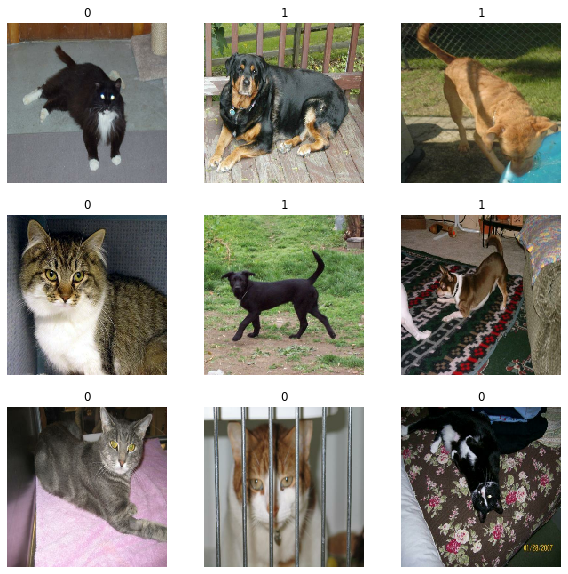

In [23]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
